In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
#from numba import compiler, types
from scipy.integrate import ode

import matplotlib.gridspec as gridspec
from numba import compiler, types

 # Quadratic Integrate and Fire 
 \begin{cases} 
       C \dot{V} = a(V-b)(V-d)-U+I       \\
       \dot{U} = e(f(V-b)-U) \\
       V=m,\space U=U+n, если \space V \geq V_{peak}
   \end{cases}
  
V - мембранный потенциал.  U - (потоки Кальция?). C - мембранная емкость. b - мембранный потенциал покоя. d - мгновенный пороговый потенциал. e - постоянная времени восстановления. n - сумма токов.




In [2]:

h = 0.1 # шаг интегрирования 
def system1(t, state, params):
    a, b, C, d, e, f, m, n, vpeak, I  = params 
    
     
    
    v, u = state 
    #print(v, u)
    if(v==vpeak): #эта функция очень упрощенная, тут идет просто перестановка значений 
        #print("peak")
        vnew = m
        unew = u+n
        return np.array([vnew, unew]) 
    
    vnew = (a*(v-b)*(v-d)-u+I)/C
    unew = e*(f*(v-b)-u)
    
    # на данный момент неэффектиная часть функции 
    if(vnew + h*(a*(vnew-b)*(vnew-d)-unew+I)/C >= vpeak):
        #print("cutoff")
        vnew = vpeak
        #print(vnew)
    
 
    return np.array([vnew, unew])
    

def system(t, state, params):
    a, b, C, d, e, f, m, n, vpeak, I  = params 
    v, u = state
    vnew = (a*(v-b)*(v-d)-u+I)/C
    unew = e*(f*(v-b)-u)
    return np.array([vnew, unew])
    

In [3]:
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -50
n =  50 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 500.0

Текущие параметры: m=-50, n=50 

Text(0.5, 1.0, 'Фазовая траектория')

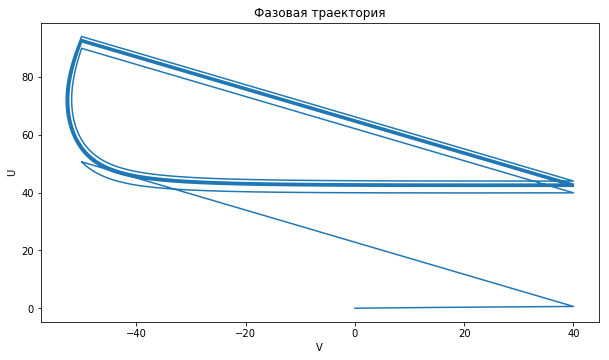

In [25]:
#просто просмотр метода Эйлера для первого случая 
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -50
n =  50 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 500.0

v = [0]
u = [0]
t = [0]
h = 0.001
while(t[-1]<200):
    t.append(t[-1]+h)
    vnew = v[-1]+h*(a*(v[-1]-b)*(v[-1]-d)-u[-1]+I)/C
    unew = u[-1]+h*e*(f*(v[-1]-b)-u[-1])
    if(vnew>=vpeak):
        v[-1] = vpeak
        vnew = m 
        unew = unew+n
    
    v.append(vnew)
    u.append(unew)
    
plt.figure(figsize=(10,5.5))
plt.plot(v ,  u , "-")
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")

Использование встренной функции для интегрирования системы. 

In [4]:
# Интегратор 
prop = ode(system)
prop.set_integrator('dop853')
#prop.set_integrator("dopri5" )
prop.set_f_params(params)
prop.set_initial_value(s0, t0)

In [5]:
#%%timeit
prop.set_initial_value(s0, t0)
v_u = np.array([prop.y])
t_values = [0.0]
while prop.successful() and prop.t < t_end:
    t_values.append(prop.t+h)
    prop.integrate(prop.t+h)
    #print(prop.y)
    if(prop.y[0]>=vpeak):
        v_u[-1][0] = vpeak
        prop.set_initial_value([m, prop.y[1]+n], prop.t)
    
    
    v_u = np.append(v_u, [prop.y ], axis = 0  )



Text(0.5, 1.0, 'Фазовая траектория')

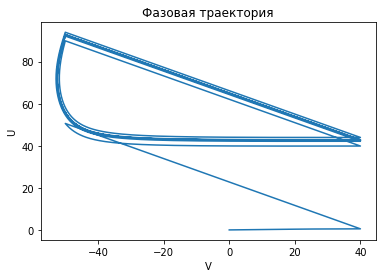

In [6]:
plt.plot(v_u[:,0], v_u[:,1], "-")
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")

Text(0.5, 1.0, 'Фазовая траектория')

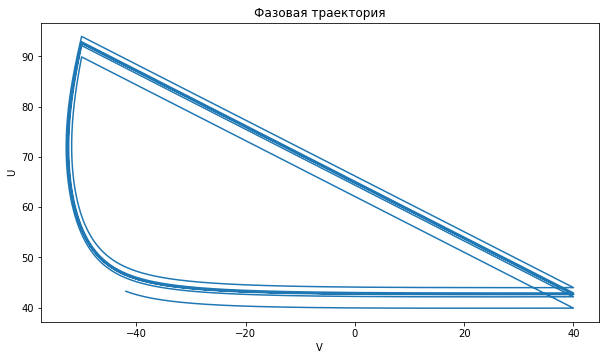

In [7]:
plt.figure(figsize=(10,5.5))
plt.plot(v_u[100:,0], v_u[100:,1], "-") # первые сто значений не рисуются
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")

Text(0.5, 1.0, 'Изменения мембранного потенациала')

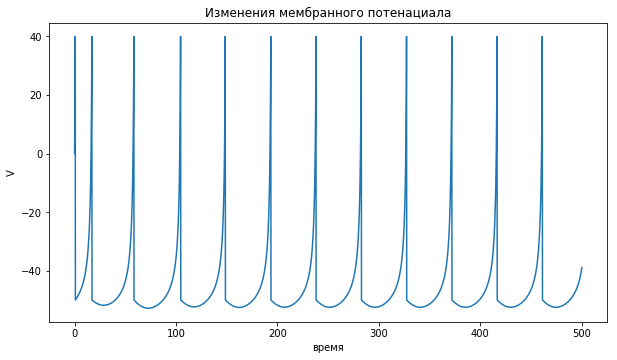

In [8]:
plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,0], "-")
plt.xlabel("время")
plt.ylabel("V")
plt.title("Изменения мембранного потенациала")

Text(0.5, 1.0, 'Изменения U')

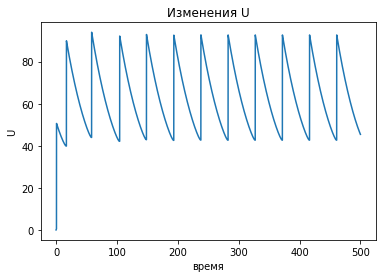

In [9]:
plt.plot(t_values , v_u[: ,1], "-")
plt.xlabel("время")
plt.ylabel("U")
plt.title("Изменения U")

Новые параметры: m = -45, n=50 

Text(0.5, 1.0, 'Изменения U')

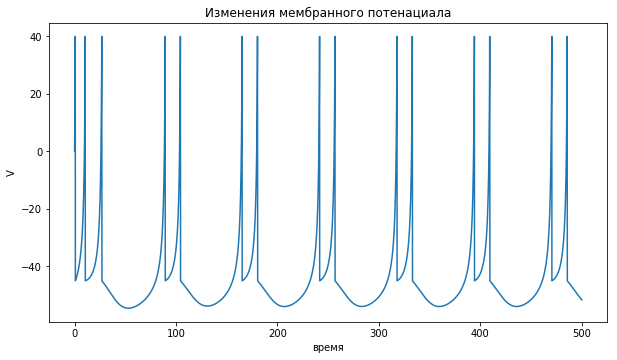

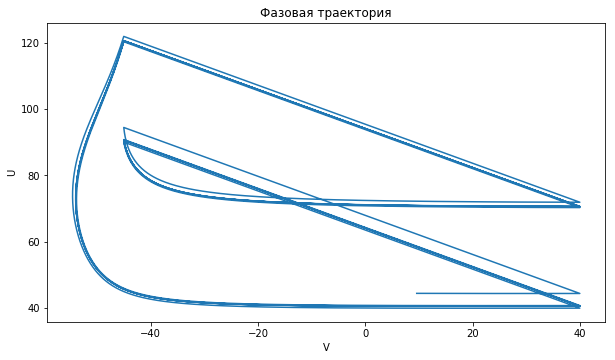

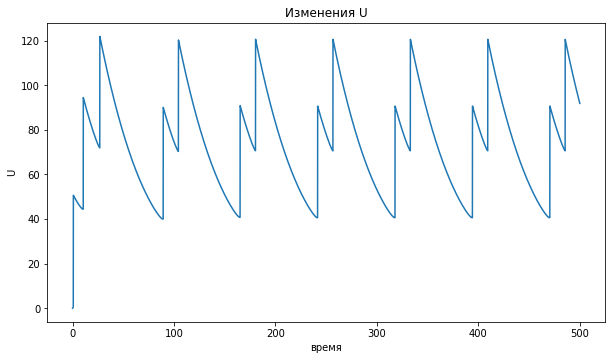

In [30]:
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -45
n =  50 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 500.0
h=0.1
prop = ode(system)
prop.set_integrator('dop853')
#prop.set_integrator("dopri5" )
prop.set_f_params(params)
prop.set_initial_value(s0, t0)

prop.set_initial_value(s0, t0)
v_u = np.array([prop.y])
t_values = [0.0]
while prop.successful() and prop.t < t_end:
    t_values.append(prop.t+h)
    prop.integrate(prop.t+h)
    #print(prop.y)
    if(prop.y[0]>=vpeak):
        v_u[-1][0] = vpeak
        prop.set_initial_value([m, prop.y[1]+n], prop.t)
    
    
    v_u = np.append(v_u, [prop.y ], axis = 0  )

plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,0], "-")
plt.xlabel("время")
plt.ylabel("V")
plt.title("Изменения мембранного потенациала")

plt.figure(figsize=(10,5.5))
plt.plot(v_u[100:,0], v_u[100:,1], "-")
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")


plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,1], "-")
plt.xlabel("время")
plt.ylabel("U")
plt.title("Изменения U")

Новые параметры: m = -35, n=60

Text(0.5, 1.0, 'Изменения U')

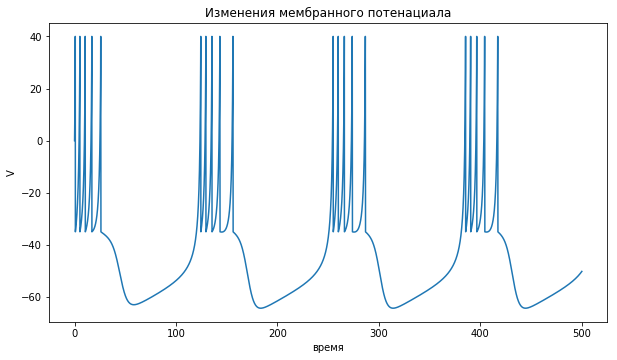

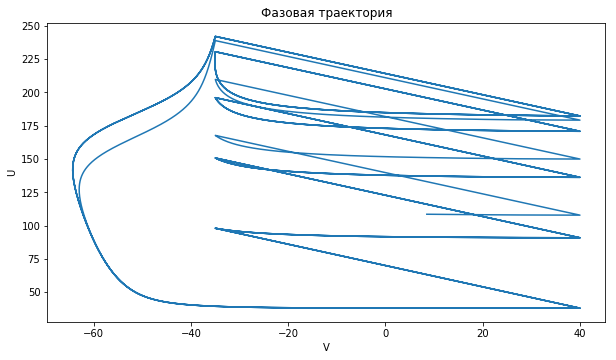

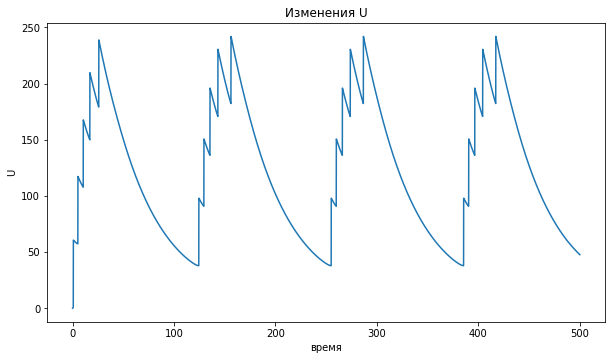

In [31]:
a = 0.5
b = -60.0
C = 50.0 
d = -45.0
e = 0.02
f = 0.5 
m = -35
n =  60 
vpeak = 40.0
I = 100.0
params = np.array([a, b, C, d, e, f, m, n, vpeak, I])
s0 = [0.0, 0.0 ]
t0 = 0.0
t_end = 500.0

prop = ode(system)
prop.set_integrator('dop853')
#prop.set_integrator("dopri5" )
prop.set_f_params(params)
prop.set_initial_value(s0, t0)

prop.set_initial_value(s0, t0)
v_u = np.array([prop.y])
t_values = [0.0]
while prop.successful() and prop.t < t_end:
    t_values.append(prop.t+h)
    prop.integrate(prop.t+h)
    #print(prop.y)
    if(prop.y[0]>=vpeak):
        v_u[-1][0] = vpeak
        prop.set_initial_value([m, prop.y[1]+n], prop.t)
    
    
    v_u = np.append(v_u, [prop.y ], axis = 0  )

plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,0], "-")
plt.xlabel("время")
plt.ylabel("V")
plt.title("Изменения мембранного потенациала")

plt.figure(figsize=(10,5.5))
plt.plot(v_u[100:,0], v_u[100:,1], "-")
plt.xlabel("V")
plt.ylabel("U")
plt.title("Фазовая траектория")

plt.figure(figsize=(10,5.5))
plt.plot(t_values, v_u[:,1], "-")
plt.xlabel("время")
plt.ylabel("U")
plt.title("Изменения U")